# Hypothesis Tests

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = np.loadtxt("../data/loaded_500.txt")

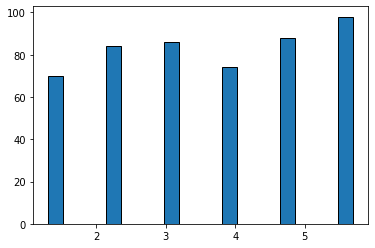

In [3]:
plt.hist(data, ec="k", bins=6, rwidth=0.25);

In [4]:
num_6 = sum(data == 6)
total = data.size
print("Number of sixes:", num_6)

Number of sixes: 98


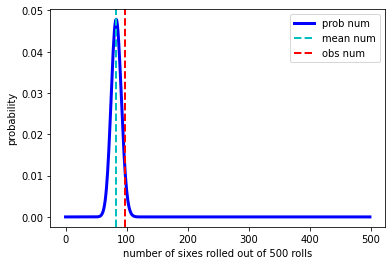

In [5]:
# probability of rolling 98 or more 6's with a fair dice
n = np.arange(total)
prob_n = ss.binom.pmf(n, total, 1 / 6)

plt.plot(n, prob_n, c="b", lw=3, label="prob num")
plt.axvline(total / 6, ls="--", lw=2, c="c", label="mean num")
plt.axvline(num_6, ls="--", color="r", lw=2, label="obs num")
plt.ylabel("probability")
plt.xlabel(f"number of sixes rolled out of {total} rolls")
plt.legend();

only 3.7% of the time with a fair dice would you roll a six more than 98 times


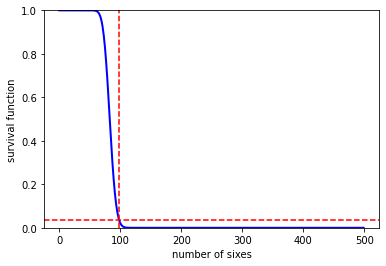

In [6]:
d = ss.binom(total, 1 / 6)
plt.plot(n, d.sf(n), c="b", lw=2)
plt.axvline(num_6, ls="--", color="r")
sf = d.sf(num_6)
plt.axhline(sf, ls="--", c="r")
plt.xlabel("number of sixes")
plt.ylabel("survival function")
plt.ylim(0, 1)
print(
    f"only {sf * 100:.1f}% of the time with a fair dice would you roll a six more than {num_6} times"
)

In [7]:
df = pd.read_csv("../data/Meteorite_Landings.csv")
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [9]:
df2 = df.dropna(subset=["mass", "year"])
df2 = df2[df2["mass"] > 0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45292 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45292 non-null  object 
 1   id           45292 non-null  int64  
 2   nametype     45292 non-null  object 
 3   recclass     45292 non-null  object 
 4   mass         45292 non-null  float64
 5   fall         45292 non-null  object 
 6   year         45292 non-null  float64
 7   reclat       38097 non-null  float64
 8   reclong      38097 non-null  float64
 9   GeoLocation  38097 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.8+ MB


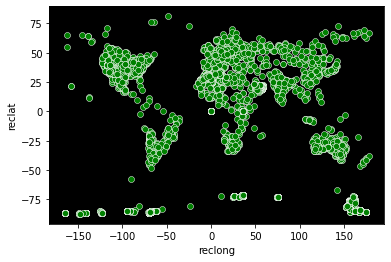

In [10]:
plt.figure()
plt.gca().set_facecolor("k")
sns.scatterplot(x="reclong", y="reclat", data=df2, color="g");

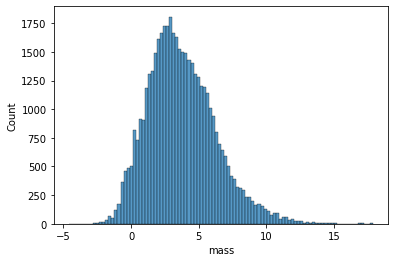

In [11]:
sns.histplot(x=np.log(df2["mass"]), bins=100);

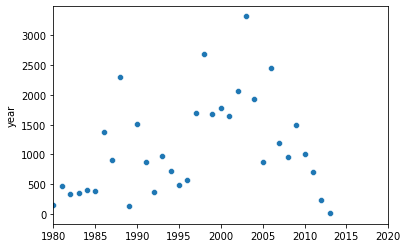

In [12]:
counts = df2["year"].value_counts()
sns.scatterplot(x=counts.index, y=counts)
plt.xlim(1980, 2020);

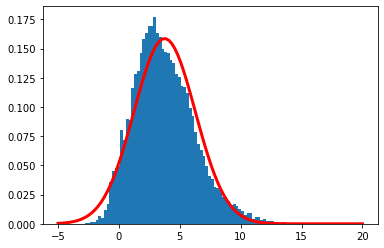

In [13]:
ms = np.linspace(-5, 20, 100)
logmass = np.log(df2["mass"])
mean, std = logmass.mean(), np.std(logmass)
pdf_norm = ss.norm.pdf(ms, mean, std)

plt.hist(logmass, bins=100, density=True)
plt.plot(ms, pdf_norm, "r-", lw=3);

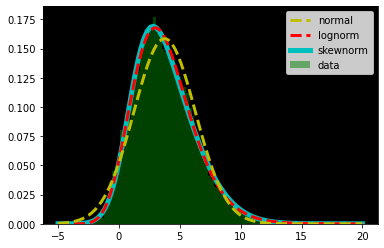

In [14]:
log_params = ss.lognorm.fit(logmass)
pdf_lognorm = ss.lognorm.pdf(ms, *log_params)

skew_params = ss.skewnorm.fit(logmass)
pdf_skewnorm = ss.skewnorm.pdf(ms, *skew_params)

plt.figure()
ax = plt.gca()
ax.set_facecolor("k")
plt.hist(logmass, bins=100, density=True, color="g", alpha=0.5, label="data")
plt.plot(ms, pdf_norm, "y--", lw=3, zorder=3, label="normal")
plt.plot(ms, pdf_lognorm, "r--", lw=3, zorder=2, label="lognorm")
plt.plot(ms, pdf_skewnorm, "c-", lw=5, zorder=1, label="skewnorm")
plt.legend();

In [15]:
mass_of_doom = np.log(
    (4 / 3) * np.pi * 500**3 * 1600 * 1000
)  # spherical approximation
print(mass_of_doom)

34.36175044077777


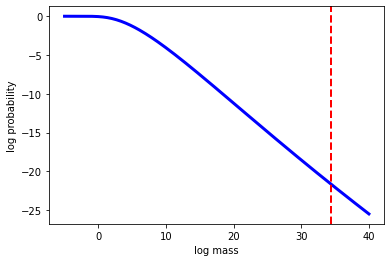

In [16]:
ms2 = np.linspace(-5, 40, 200)
plt.plot(ms2, ss.lognorm.logsf(ms2, *log_params), color="b", lw=3)
plt.axvline(mass_of_doom, ls="--", c="r", lw=2)
plt.xlabel("log mass")
plt.ylabel("log probability");

In [17]:
prob_small_mass = ss.lognorm.cdf(mass_of_doom, *log_params)
print(prob_small_mass)

0.9999999995938732


In [18]:
frac_sky_monitored = 0.2  # only see some events
num_years = 1000
num_events = num_years * counts.max() / frac_sky_monitored
print(num_events)

16610000.0


In [19]:
prob_large_mass = 1 - prob_small_mass
print(prob_large_mass)

4.0612679885754233e-10


In [20]:
prob_bad = num_events * prob_large_mass
print(
    f"Probability that a >1km asteroid hits Earth in the next {num_years} years is {prob_bad * 100:.2f}%"
)

Probability that a >1km asteroid hits Earth in the next 1000 years is 0.67%


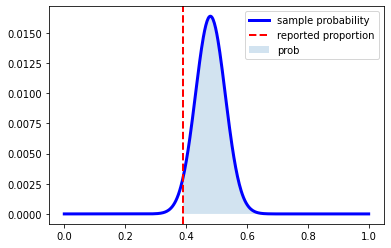

In [21]:
# null hypothesis: 39% of votes went to A and 61% of votes went to B
# alternative hypothesis: >39% of votes went to A and <61% went to B
n_votes = 100
sigma = np.sqrt(0.39 * 0.61 / n_votes)
reported = 0.39
sample = 0.48

xs = np.linspace(0, 1, 500)
ps = ss.norm.pdf(xs, sample, sigma)
ps /= sum(ps)

plt.plot(xs, ps, lw=3, color="blue", label="sample probability")
plt.axvline(reported, ls="--", lw=2, c="r", label="reported proportion")
plt.fill_between(xs, ps, 0, alpha=0.2, where=xs >= reported, label="prob")
plt.legend(loc="best");

In [22]:
prob_more = ss.norm.sf(reported, sample, sigma)
print(f"There is a {100 * prob_more:.2f}% chance that candidate A got more votes")

There is a 96.75% chance that candidate A got more votes


In [23]:
z_score = (sample - reported) / sigma
z_score_needed_for_significance = ss.norm.ppf(0.95)
print(
    f"{z_score:.3f} is larger than {z_score_needed_for_significance:.3f} so we are significant"
)
print(f"have p-value {ss.norm.sf(sample, reported, sigma):.3f}")

1.845 is larger than 1.645 so we are significant
have p-value 0.033


#### Changing the number of votes will affect the results

i.e. less votes makes our p-value grow and more votes decreases our p-value and makes our significance increase

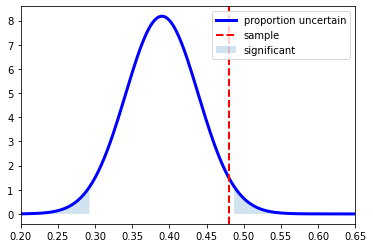

In [24]:
# what is the chance that candidate A got a significantly different amount of votes than reported?
xs = np.linspace(0, 1, 500)
ps = ss.norm.pdf(xs, reported, sigma)

plt.plot(xs, ps, lw=3, c="b", label="proportion uncertain")
plt.axvline(sample, ls="--", c="r", lw=2, label="sample")
limits = ss.norm.ppf([0.025, 0.975], reported, sigma)
plt.fill_between(
    xs, ps, 0, alpha=0.2, where=(xs < limits[0]) | (xs > limits[1]), label="significant"
)
plt.legend()
plt.xlim(0.2, 0.65);

In [25]:
z_score = (sample - reported) / sigma
z_score_needed_for_significance = ss.norm.ppf(0.975)
print(
    f"{z_score:.3f} is less than {z_score_needed_for_significance:.3f} so we are not significant"
)

p_value_two_tailed = 2 * ss.norm.sf(z_score)
print(f"have p-value {p_value_two_tailed:.3f} which is > 0.05")

1.845 is less than 1.960 so we are not significant
have p-value 0.065 which is > 0.05


P-value is 0.295


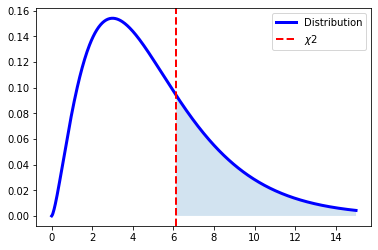

In [26]:
# chi square test
data = np.loadtxt("../data/loaded_500.txt")
unique, counts = np.unique(data, return_counts=True)
expected = data.size / 6
chi2_val = np.sum((counts - expected) ** 2 / expected)

chi2s = np.linspace(0, 15, 500)
prob = ss.chi2.pdf(chi2s, 5)

plt.plot(chi2s, prob, lw=3, c="b", label="Distribution")
plt.axvline(chi2_val, label="$\chi2$", ls="--", lw=2, c="r")
plt.fill_between(chi2s, prob, 0, where=(chi2s >= chi2_val), alpha=0.2)
plt.legend()
print(f"P-value is {ss.chi2.sf(chi2_val, 5):.3f}")

In [27]:
chisq, p = ss.chisquare(counts, expected)
print(f"we have a chi2 of {chisq:.2f} with a p-value of {p:.3f}")

we have a chi2 of 6.11 with a p-value of 0.295


In [28]:
rolls = np.loadtxt("../data/loaded_many_100.txt")
unique, counts = np.unique(rolls, return_counts=True)
counts = counts / counts.sum()

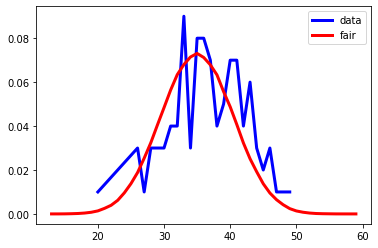

In [29]:
fair_rolls = np.random.randint(low=1, high=7, size=(500000, 10)).sum(axis=1)
unique2, count_fair = np.unique(fair_rolls, return_counts=True)
count_fair = count_fair / count_fair.sum()

plt.plot(unique, counts, lw=3, c="b", label="data")
plt.plot(unique2, count_fair, lw=3, c="r", label="fair")
plt.legend();

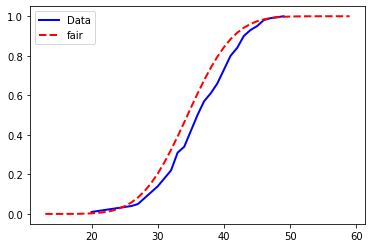

In [30]:
cdf_obs = counts.cumsum()
cdf_fair = count_fair.cumsum()

plt.plot(unique, cdf_obs, lw=2, c="b", label="Data")
plt.plot(unique2, cdf_fair, lw=2, c="r", ls="--", label="fair")
plt.legend();

In [31]:
statistic, pval = ss.ks_2samp(rolls, fair_rolls)
print(f"KS test statistic of {statistic:.3f}, p-value of {pval:.3f}")

KS test statistic of 0.135, p-value of 0.048


In [32]:
statistic, critical_vals, sig_level = ss.anderson_ksamp([rolls, fair_rolls])
print(f"AD test statistic of {statistic:.3f}, sig-level of {sig_level:.9f}")
print(f"Test critical values are {critical_vals}")
print(
    "Sig-level analogous to p-value, and critical values are [25%, 10%, 5%, 2.5%, 1%]"
)

AD test statistic of 5.335, sig-level of 0.002635535
Test critical values are [0.325 1.226 1.961 2.718 3.752 4.592 6.546]
Sig-level analogous to p-value, and critical values are [25%, 10%, 5%, 2.5%, 1%]
